**Belinda Putri Adi Permana - 0706022210014**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load Dataset

In [88]:
url = r'https://raw.githubusercontent.com/belinda2201/Data-Mining/refs/heads/main/bank.csv'
df = pd.read_csv(url, delimiter=';')

## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [89]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [90]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [92]:
unknown_counts = (df == 'unknown').sum()
print("Count of 'unknown' values in each column:\n", unknown_counts)

Count of 'unknown' values in each column:
 age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64


In [93]:
df['job'] = df['job'].replace({'admin.': 'admin_management', 'management': 'admin_management'})
unique_jobs = df['job'].unique()
print("Unique job categories after combining:\n", unique_jobs)

Unique job categories after combining:
 ['unemployed' 'services' 'admin_management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'student' 'housemaid' 'retired' 'unknown']


## Visualisation

C:\Users\Belinda\AppData\Local\Temp\ipykernel_13136\3595889385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


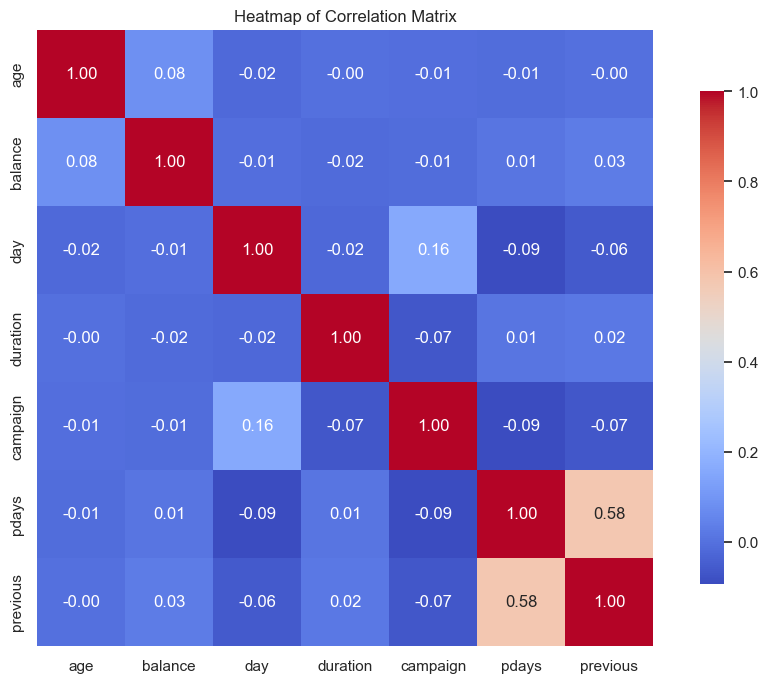

In [94]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap of Correlation Matrix')
plt.show()

From the heatmap above, we can see that the variable day and campaign had the most positive correlation.

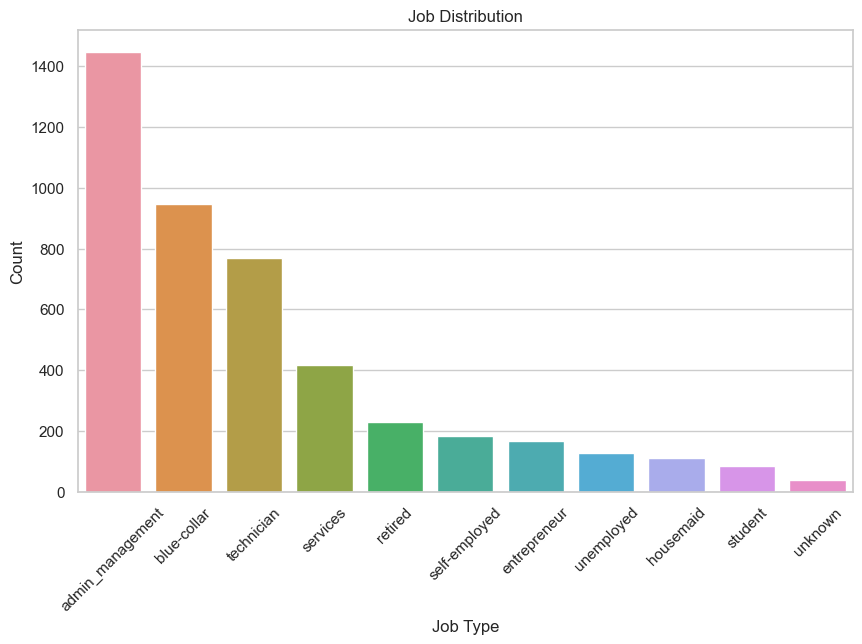

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.show()

From the bar chart above, since the admin and management has been combined, admin_management has the highest count followed by blue-collar and technician.

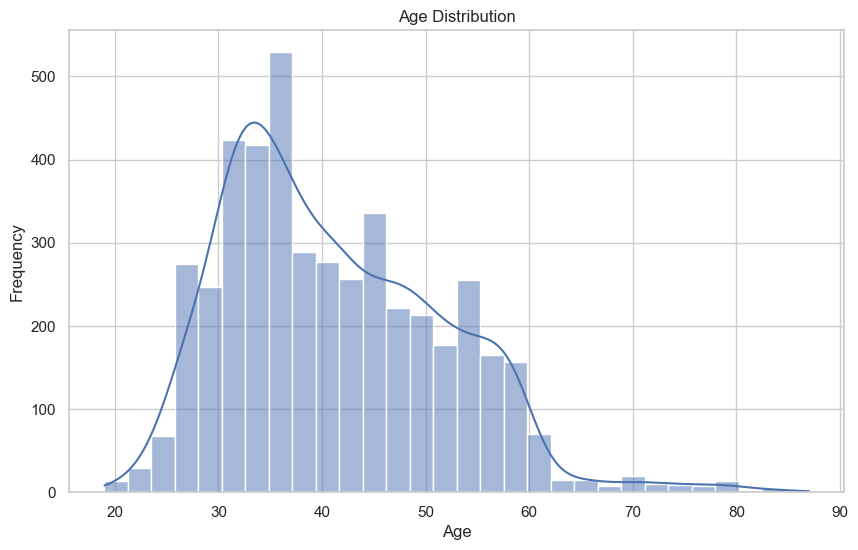

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In this chart, it shows that most of data's age ranged from 30-40, while 70-90 being the lowest range.

## Machine Learning

In [97]:
le = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']:
  df[col] = le.fit_transform(df[col])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,6,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,0,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,0,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [98]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3616, 16), (905, 16))

## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [99]:
#a. Defining the model
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
#b. Predict the test set results
y_pred_rf = rf_clf.predict(X_test)

In [101]:
#c. Check accuracy score
print('Model accuracy score with Random Forest: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score with Random Forest: 0.9006


In [102]:
#d. Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix Random Forest Index\n', cm_rf)

Confusion Matrix Random Forest Index
 [[785  22]
 [ 68  30]]


In [103]:
#e. Classification Matrix
print('Classification Report Random Forest\n', classification_report(y_test, y_pred_rf))

Classification Report Random Forest
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.58      0.31      0.40        98

    accuracy                           0.90       905
   macro avg       0.75      0.64      0.67       905
weighted avg       0.88      0.90      0.89       905



Accuracy: 0.9005524861878453
The Random Forest model achieved an accuracy of 90.06%.
Confusion Matrix and Classification Report provide insights into how well the model classified each class.


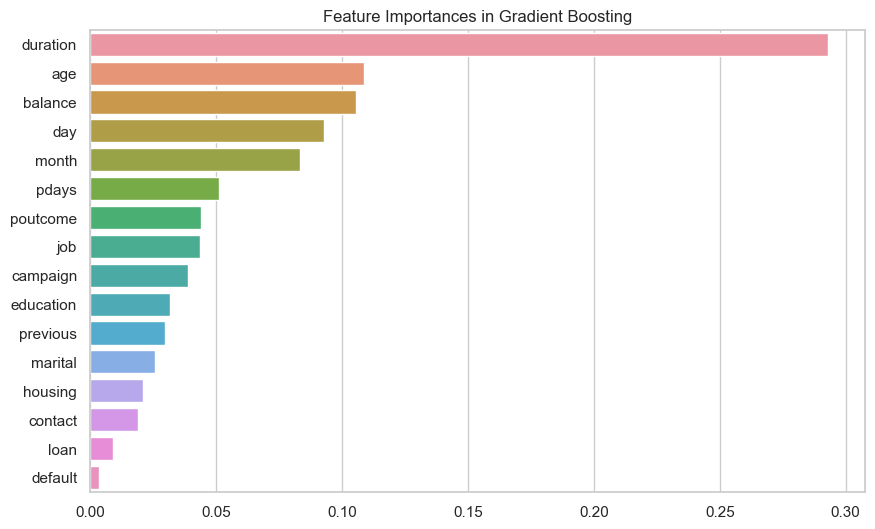

In [104]:
#f. Results and conclusion
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("The Random Forest model achieved an accuracy of {:.2f}%.".format(accuracy_rf * 100))
print("Confusion Matrix and Classification Report provide insights into how well the model classified each class.")

feature_importances = rf_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices])
plt.title("Feature Importances in Gradient Boosting")
plt.show()

## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [105]:
#a. Defining the model
gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_features=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_features=3, random_state=42)

In [106]:
#b. Predict the test set result
y_pred_gbc = gbc_clf.predict(X_test)

In [107]:
#c. Check accuracy score
print('Model accuracy score with Gradient Boosting Classifier: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gbc)))

Model accuracy score with Gradient Boosting Classifier: 0.8928


In [108]:
#d. Confusion
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print('Confusion Matrix Random Forest Index\n', cm_gbc)

Confusion Matrix Random Forest Index
 [[782  25]
 [ 72  26]]


In [109]:
#e. Classification Report
print('Classification Report Gradient Boosting Classifier\n', classification_report(y_test, y_pred_gbc))

Classification Report Gradient Boosting Classifier
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.51      0.27      0.35        98

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.65       905
weighted avg       0.87      0.89      0.88       905



Accuracy: 0.8928176795580111
The Gradient Boosting model achieved an accuracy of 89.28%.
Confusion Matrix and Classification Report provide insights into how well the model classified each class.


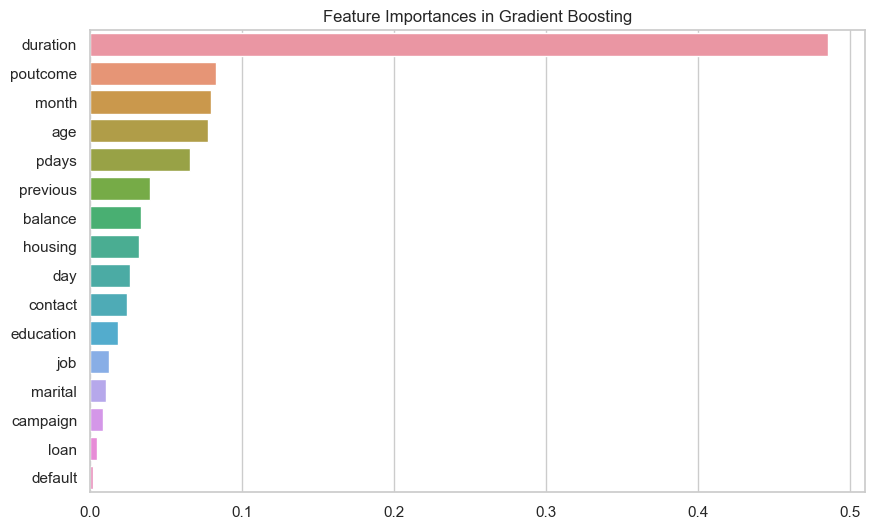

In [110]:
#f. Results and conclusion
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Accuracy:", accuracy_gbc)
print("The Gradient Boosting model achieved an accuracy of {:.2f}%.".format(accuracy_gbc * 100))
print("Confusion Matrix and Classification Report provide insights into how well the model classified each class.")

feature_importances = gbc_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices])
plt.title("Feature Importances in Gradient Boosting")
plt.show()

## Conclusion

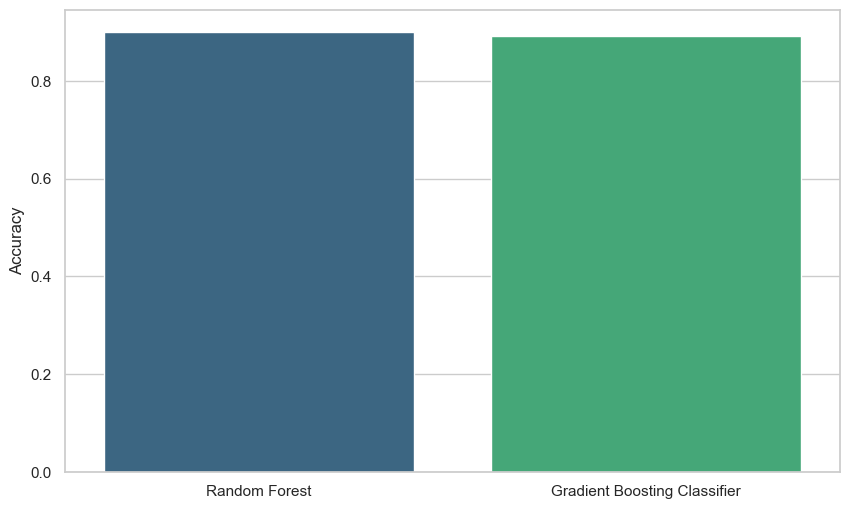

In [111]:
accuracy_scores = {
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting Classifier": accuracy_score(y_test, y_pred_gbc)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.ylabel("Accuracy")
plt.show()

From this result, we can see that Random Forest has slightly higher accuracy from Gradient Boosting Classifier. Therefore, it is better to use Random Forest.